## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [29]:
# If you didn't download it yet, please get the relevant file now!
!curl https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

301 Moved Permanently
The resource has been moved to /s/raw/xvjzaxzz3ysphme/data_000637.txt;
you should be redirected automatically.




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   140    0   140    0     0    142      0 --:--:-- --:--:-- --:--:--   142


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

 Data intake took:  0.9224460625555366  seconds


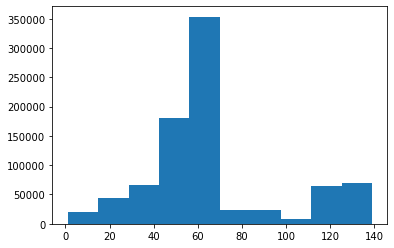

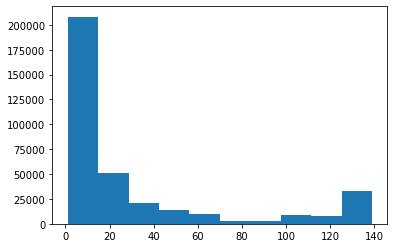

               HEAD    FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS  tot_time
TDC_CHANNEL                                                           
139          100201  100201     100201      100201    100201    100201
64            61118   61118      61118       61118     61118     61118
63            59841   59841      59841       59841     59841     59841
number of unique orbits: 
 10353
number of orbits for tdc=139: 
 ORBIT_CNT    10328
Name: 139, dtype: int64


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file='data_000637.txt'

N=np.random.randint(10000,1310719)

#1)
f=pd.read_csv(file, nrows=N)
c=pd.DataFrame(f)
c

#2)
#the maximum value of the BX_COUNTER will be when the orbit_cnt changes
BX=c['BX_COUNTER'].max()

#3)

time1=c['ORBIT_CNT'][0]*BX*25e-09+c['BX_COUNTER'][0]*25e-09+c['TDC_MEAS'][0]*25e-09/30
time2=c['ORBIT_CNT'][N-1]*BX*25e-09+c['BX_COUNTER'][N-1]*25e-09+c['TDC_MEAS'][N-1]*25e-09/30

print(' Data intake took: ', time2-time1,' seconds')

#4)

time_ns=c['ORBIT_CNT']*BX+c['BX_COUNTER']*25+c['TDC_MEAS']*25/30 
c['tot_time']=time_ns



#5)
c['HEAD']=np.random.randint(0,2,N)

#6)

c2=c.copy()
c2[c2['HEAD']>0]
#print(c2)

#7)
#for 'FPGA'==0

g0=c[c['FPGA']==0]['TDC_CHANNEL']

plt.hist(g0)
plt.show()
#for 'FPGA'==1
g1=c[c['FPGA']==1]['TDC_CHANNEL']

plt.hist(g1)
plt.show()

#8)

c3=c.copy()
print(c3.groupby(c3['TDC_CHANNEL']).count().nlargest(3,columns='FPGA',keep='all'))#COLUMNS CAN BE WHATEVER COLUMN EXCEPT 'TDC_CHANNEL'

#9)

print('number of unique orbits: \n',len(np.unique(c['ORBIT_CNT'])))

c4=(c3.groupby('TDC_CHANNEL').nunique())
print('number of orbits for tdc=139: \n',c4.loc[139,['ORBIT_CNT']])
